#### 교차검증을 간단하게하는 방법
- 프로세스(폴드 설정 -> 루프반복을 통해서 학습 및 테스트의 인덱스 추출 -> 학습과예측)

- cross_val_score(예측모델 , 피처세트 , 레이블 , 성능평가 지표 , 폴드 수)



In [1]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.datasets import load_iris

In [4]:
iris_data = load_iris()
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
data     = iris_data.data
label    = iris_data.target

In [13]:
dt_clf = DecisionTreeClassifier(random_state=100)

# 성능평가지표는 acc , 교차검증 5개
scores = cross_val_score(dt_clf , data , label , cv=5 , scoring='accuracy')
scores 

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

In [14]:
import numpy as np

print('평균 검증 정확도 : ' , np.round(np.mean(scores), 4 ) ) 

평균 검증 정확도 :  0.9533


In [15]:
scores = cross_validate(dt_clf , data , label , cv=5 , scoring='accuracy')
scores 

{'fit_time': array([0.00100064, 0.00100279, 0.0010004 , 0.00100851, 0.00099659]),
 'score_time': array([0.00099802, 0.00099754, 0.        , 0.00099492, 0.        ]),
 'test_score': array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])}

#### 교차검증과 하이퍼파라미터를 한번에 할 수 있는 
- GridSearchCV

In [ ]:
# https://www.npackd.org/p/org.graphviz.Graphviz/2.38
# pip install graphviz


- 엔트로피 이해

In [16]:
import numpy  as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# 샘플 데이터 생성
grp01 = np.array([0.3, 0.4, 0.3])
grp02 = np.array([0.7, 0.2, 0.1])
grp03 = np.array([0.01, 0.01, 0.98])


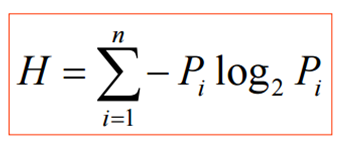

In [20]:
from IPython.display import Image
Image('c:/img/entropy.png', width = 700)

# 만약 3개 Yes 이고 2개 No 
# 엔트로피
# H = -(2/5)log(2/5)-(3/5)log(3/5) = 0.971

In [22]:
def entropy(x) :
    return (-x*np.log2(x)).sum()

In [23]:
e01 = entropy(grp01)
e02 = entropy(grp02)
e03 = entropy(grp03)

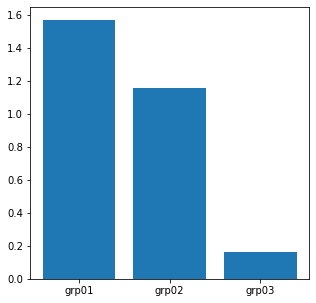

In [24]:
plt.figure(figsize=(5 , 5))

plt.bar(['grp01' , 'grp02' , 'grp03'] , [e01, e02, e03])

plt.show()
plt.close()


In [25]:
import graphviz

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

- min_samples_split : 노드를 분리하기 위한 최소한의 샘플 수(과적합을 제어할 때 사용)
- min_samples_leaf  : 리프노드가 되기위한  최소한의 샘플 수(과적합을 제어할 때 사용)
- max_features      : 
- max_depth         : 트리의 최대 깊이
- max_leaf_nodes    : 리프노드의 최대 수 

In [37]:

dt_clf = DecisionTreeClassifier(random_state=100 , criterion='entropy' , max_depth = 3 )

X_train , X_test , y_train , y_test = train_test_split(iris_data.data , iris_data.target , test_size=0.2, random_state=100)

# 학습 fit 
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=100)

In [38]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf , 
                out_file = 'iris_tree.dot' , 
                class_names = iris_data.target_names , 
                feature_names = iris_data.feature_names , 
                impurity = True , 
                filled = True)

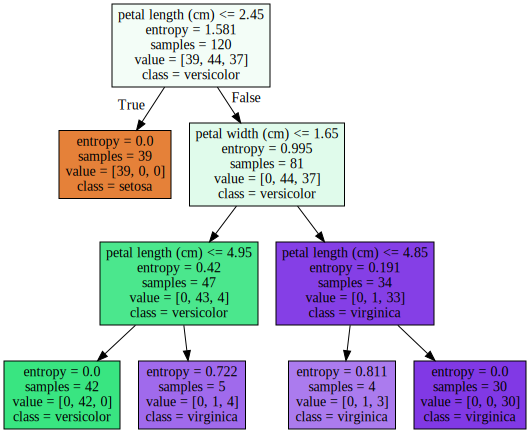

In [39]:
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files (x86)/Graphviz2.38/bin/'

with open('iris_tree.dot') as f :
    dot_graph = f.read()
graphviz.Source(dot_graph)

#### GridSearchCV

In [40]:
from sklearn.tree            import DecisionTreeClassifier
from sklearn.datasets        import load_iris
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics         import accuracy_score

import numpy  as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

- estimator  : 분류기(알고리즘)
- param_grid : { param : value , param : value}
- scoring    : 평가방법을 지정
- refit      : True(최적의 하이퍼 파라미터를 찾는 재학습)

In [44]:
# grid_parameter = { 'max_depth' : [1,2,3] , 
#                    'mim_samples_split' : [2 , 3]}
# pd.read_csv('Grid.csv' , index_col='순번')

In [49]:
X_train , X_test , y_train , y_test = train_test_split(iris_data.data , iris_data.target , test_size=0.2, random_state=100)

dt_clf = DecisionTreeClassifier(random_state=100)

grid_parameter = { 'max_depth' : [1,2,3] , 
                   'min_samples_split' : [2 , 3]}

In [50]:
dt_searchCV = GridSearchCV(dt_clf , param_grid = grid_parameter , cv = 3 , refit=True)
dt_searchCV.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]})

In [51]:
dt_searchCV.cv_results_

{'mean_fit_time': array([0.00066622, 0.00100017, 0.00066725, 0.00100072, 0.0013326 ,
        0.00099826]),
 'std_fit_time': array([4.71089465e-04, 1.01152436e-06, 4.71819920e-04, 4.89903609e-07,
        4.73510636e-04, 5.84003864e-07]),
 'mean_score_time': array([0.00066646, 0.        , 0.00033331, 0.00066845, 0.00066733,
        0.        ]),
 'std_score_time': array([0.00047126, 0.        , 0.00047137, 0.00047267, 0.00047188,
        0.        ]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'min_samples_split': 2},
  {'max_depth': 1, 'min_samples_split': 3},
  {'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_samples_split': 3},
  {'ma

In [52]:
scoreDF = pd.DataFrame(dt_searchCV.cv_results_)
scoreDF

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000666,4.710895e-04,0.000666,0.000471,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.70,0.700,0.675,0.691667,0.011785,5
1,0.001000,1.011524e-06,0.000000,0.000000,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.70,0.700,0.675,0.691667,0.011785,5
2,0.000667,4.718199e-04,0.000333,0.000471,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.95,0.900,1.000,0.950000,0.040825,3
3,0.001001,4.899036e-07,0.000668,0.000473,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.95,0.900,1.000,0.950000,0.040825,3
4,0.001333,4.735106e-04,0.000667,0.000472,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.95,0.975,1.000,0.975000,0.020412,1
5,0.000998,5.840039e-07,0.000000,0.000000,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.95,0.975,1.000,0.975000,0.020412,1


In [53]:
scoreDF[['params' , 'rank_test_score' ]]

,params,rank_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",5
1,"{'max_depth': 1, 'min_samples_split': 3}",5
2,"{'max_depth': 2, 'min_samples_split': 2}",3
3,"{'max_depth': 2, 'min_samples_split': 3}",3
4,"{'max_depth': 3, 'min_samples_split': 2}",1
5,"{'max_depth': 3, 'min_samples_split': 3}",1


In [56]:
print('최적의 파라미터  : ' , dt_searchCV.best_params_)
print('최적의 정확도    : ' , dt_searchCV.best_score_)
print('최적의 Estimator : ' , dt_searchCV.best_estimator_)

최적의 파라미터  :  {'max_depth': 3, 'min_samples_split': 2}
최적의 정확도    :  0.975
최적의 Estimator :  DecisionTreeClassifier(max_depth=3, random_state=100)


In [57]:
model = dt_searchCV.best_estimator_
pred  = model.predict(X_test)

print('모델 정확도     : ' , accuracy_score(y_test , pred))

모델 정확도     :  0.9666666666666667
